In [2]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
#MAANG and Crypto files
maang_data_path = "../resources/Maang stock prices/combined_file.csv"
btc_data_path = "../resources/BTC-USD.csv"
doge_data_path = "../resources/DOGE-USD.csv"

In [4]:
#Read MAANG and Crypto files
maang_df = pd.read_csv(maang_data_path)
btc_df = pd.read_csv(btc_data_path)
doge_df = pd.read_csv(doge_data_path)

#Remove additional header rows from MAANG file
value_to_remove = 'Name'
maang_df = maang_df[maang_df['Name'] != value_to_remove]
maang_df.head()


,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,7/30/18,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,7/31/18,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,8/1/18,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,8/2/18,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,8/3/18,91.887001,92.050003,91.074997,91.164497,91.164497,69210000


In [5]:
#Reformat BTC file to align with MAANG file
btc_name = "BTC"
btc_df['Name'] = btc_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_df = btc_df.reindex(columns=column_order)
btc_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,BTC,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,BTC,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,BTC,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,BTC,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,BTC,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [6]:
#Reformat DOGE file to align with MAANG file
doge_name = "DOGE"
doge_df['Name'] = doge_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
doge_df = doge_df.reindex(columns=column_order)
doge_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,DOGE,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,DOGE,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,DOGE,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,DOGE,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,DOGE,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [7]:
#Combine maang, btc, and doge dataframes into one
combined = [maang_df, btc_df, doge_df]
combined_df = pd.concat(combined)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df

#Drop NA values
clean_combined_df = combined_df.dropna()
clean_combined_df

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2018-07-30,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,2018-07-31,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,2018-08-01,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,2018-08-02,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,2018-08-03,91.887001,92.050003,91.074997,91.164497,91.164497,69210000
...,...,...,...,...,...,...,...,...
2089,DOGE,2023-07-30,0.08019,0.080439,0.077039,0.078061,0.078061,436209339.0
2090,DOGE,2023-07-31,0.078063,0.079656,0.0771,0.077818,0.077818,346973531.0
2091,DOGE,2023-08-01,0.077824,0.078168,0.076043,0.078042,0.078042,369078156.0
2092,DOGE,2023-08-02,0.078038,0.078195,0.0741,0.074213,0.074213,364508311.0


In [8]:
#Set Adj Close and Open columns as float
clean_combined_df = clean_combined_df.copy()
clean_combined_df['Adj Close'] = clean_combined_df['Adj Close'].astype(float)
clean_combined_df['Open'] = clean_combined_df['Open'].astype(float)

#Create column in dataframe for Percent Change
clean_combined_df['Percent Change'] = ((clean_combined_df['Adj Close'] - clean_combined_df['Open'])/clean_combined_df['Open']) * 100



In [20]:
#Create a list of ticker symbols
tickers = ['AMZN', 'META', 'NVDA', 'MSFT', 'GOOG', 'NFLX', 'AAPL']

#Create an empty list for percent change
percent_change = []

start_date = '2018-01-01'
end_date = '2023-08-30'

filtered_df = clean_combined_df.loc[(clean_combined_df['Date'] >= start_date) & (clean_combined_df['Date'] <= end_date)]


for stocks in tickers:
    stock_df = filtered_df.loc[filtered_df['Name'] == stocks]

    percent = stock_df['Percent Change']
    percent_change.append(percent)
    
    
    quartiles = percent.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = percent.loc[(percent < lower_bound) | (percent > upper_bound)]
    
    lower_whisker_length = lower_bound - lowerq
    upper_whisker_length = upperq - upper_bound

    potential_outliers_count = outliers.count()
    median = percent.median()
    
    print(f"{stocks}'s lower whisker length: {lower_whisker_length}")
    print(f"{stocks}'s upper whisker length: {upper_whisker_length}")
    print(f"{stocks}'s number of potential outliers: {potential_outliers_count}")
    print(f"{stocks}'s median: {median}")
    

AMZN's lower whisker length: -3.0103196066680917
AMZN's upper whisker length: -3.0103196066680917
AMZN's number of potential outliers: 48
AMZN's median: -0.026136836627531874
META's lower whisker length: -3.2887874760691096
META's upper whisker length: -3.2887874760691087
META's number of potential outliers: 45
META's median: 0.05378492935172688
NVDA's lower whisker length: -4.5527826745703415
NVDA's upper whisker length: -4.5527826745703415
NVDA's number of potential outliers: 48
NVDA's median: -0.30016772616436105
MSFT's lower whisker length: -4.329883734364888
MSFT's upper whisker length: -4.329883734364887
MSFT's number of potential outliers: 12
MSFT's median: -2.26507901124668
GOOG's lower whisker length: -2.6463896224714745
GOOG's upper whisker length: -2.6463896224714745
GOOG's number of potential outliers: 40
GOOG's median: 0.082979536708101
NFLX's lower whisker length: -3.883210614060019
NFLX's upper whisker length: -3.8832106140600184
NFLX's number of potential outliers: 42
N

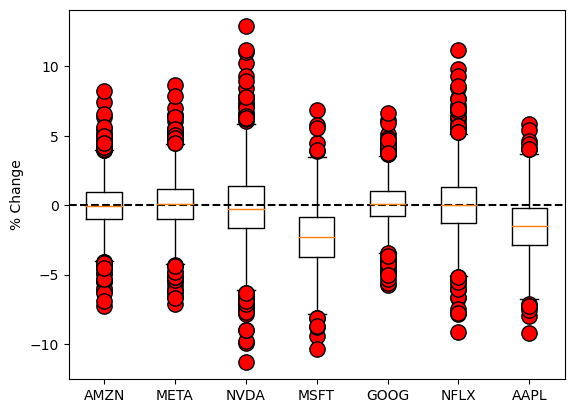

In [14]:
flierprops = dict(marker='o', markerfacecolor='r',markersize=11, markeredgecolor='black')
plt.boxplot(percent_change, labels= tickers, flierprops=flierprops)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('% Change')
plt.show()

In [21]:
#Create a list of crypto coins
crypto = ['BTC', 'DOGE']

#create empty list for crypto percent change
crypto_percent_change = []


for coins in crypto:
    crypto_df = filtered_df.loc[filtered_df['Name'] == coins]

    crypto_percent = crypto_df['Percent Change']
    crypto_percent_change.append(crypto_percent)
    
    
    quartiles = crypto_percent.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = crypto_percent.loc[(crypto_percent < lower_bound) | (crypto_percent > upper_bound)]

    lower_whisker_length = lower_bound - lowerq
    upper_whisker_length = upperq - upper_bound

    potential_outliers_count = outliers.count()
    median = crypto_percent.median()
    
    print(f"{coins}'s lower whisker length: {lower_whisker_length}")
    print(f"{coins}'s upper whisker length: {upper_whisker_length}")
    print(f"{coins}'s number of potential outliers: {potential_outliers_count}")
    print(f"{coins}'s median: {median}")

BTC's lower whisker length: -4.68992186662417
BTC's upper whisker length: -4.68992186662417
BTC's number of potential outliers: 182
BTC's median: 0.05904478858873516
DOGE's lower whisker length: -6.356003119282568
DOGE's upper whisker length: -6.356003119282567
DOGE's number of potential outliers: 202
DOGE's median: -0.11459129106187795


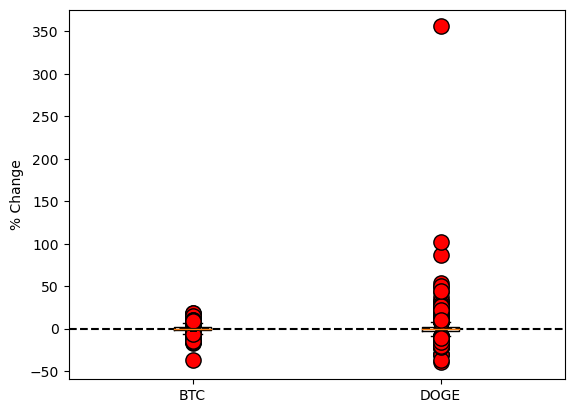

In [95]:
flierprops = dict(marker='o', markerfacecolor='r',markersize=11, markeredgecolor='black')
plt.boxplot(crypto_percent_change, labels= crypto, flierprops=flierprops)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('% Change')
plt.show()